In [40]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import avro.schema
from avro.datafile import DataFileReader
from avro.io import DatumReader
import pandas as pd
from datetime import datetime
import pytz


In [12]:
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt




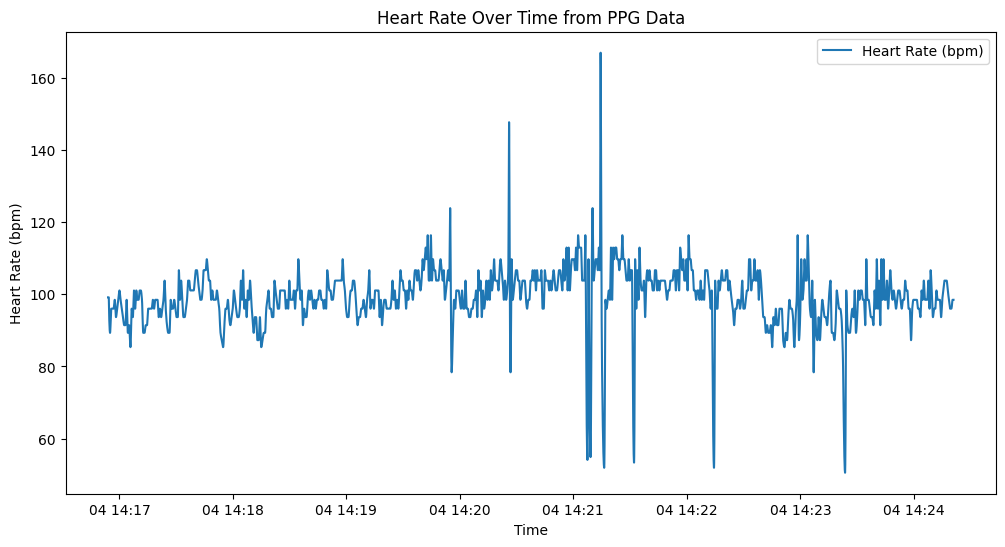

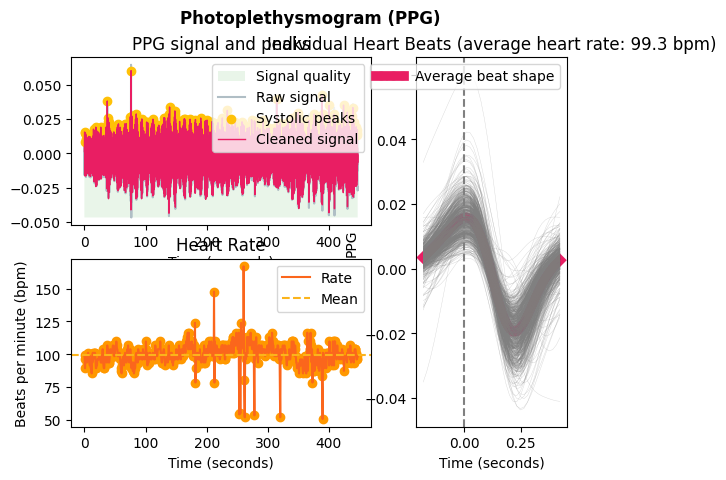

In [27]:
data = pd.read_csv('/Users/dhwanishah/Desktop/MS/VR-Dhwani/rapidhrv-avro-to-csvs/bvp_data.csv')

# Assume PPG data is sampled at 100 Hz (adjust if needed)
sampling_rate = 64  # Hz

# Process the PPG signal to identify peaks
ppg_cleaned = nk.ppg_clean(data['PPG_Raw'], sampling_rate=sampling_rate)
signals, info = nk.ppg_process(data['PPG_Raw'], sampling_rate=sampling_rate, method_quality='disimilarity')
# peaks, info = nk.ppg_peaks(signals["PPG_Rate"], sampling_rate=100, method="elgendi", show=True)
# quality = nk.ppg_quality(ppg_cleaned, sampling_rate=300, method="templatematch")
# Extract heart rate
heart_rate = signals["PPG_Rate"]  # Heart rate in bpm

# Add to DataFrame and plot
data['Heart_Rate'] = heart_rate

# Plot heart rate over time
plt.figure(figsize=(12, 6))
data['Timestamp']= pd.to_datetime(data['Timestamp'], utc=True)
plt.plot(data['Timestamp'], data['Heart_Rate'], label='Heart Rate (bpm)')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate Over Time from PPG Data')
plt.legend()
plt.show()

nk.ppg_plot(signals, info)

In [29]:
print (data['Heart_Rate'].mean())

98.96951881099804


In [31]:
# print(type(signals))
print(signals.columns)
# print(data.columns)
# print(data['PPG_Rate'].mean())
# print(signals['PPG_Rate'].mean())

# Iterate over all columns in signals data frame and print the mean of the same columns from data and signals dataframe in the same line.
for column in signals.columns:
    print(column,data[column].mean(),signals[column].mean())

Index(['PPG_Raw', 'PPG_Clean', 'PPG_Rate', 'PPG_Quality', 'PPG_Peaks'], dtype='object')
PPG_Raw -1.9516604687736356e-05 -1.9516604687736356e-05
PPG_Clean -4.277758153713836e-06 4.470912857438395e-06
PPG_Rate 0.9113271698079827 98.96951881099804
PPG_Quality -2.332531166085677 -1.5728006554444203e-06
PPG_Peaks 0.0 0.02569211409395973


In [22]:
import os
import pandas as pd
import neurokit2 as nk

# Define the input and output directories
input_dir = "/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr"  # Input directory containing subject folders
output_dir = "/Users/dhwanishah/Desktop/MS/VR-Dhwani/neurokit-64-hr"      # Output directory to save processed files

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each subject folder
for subject_folder in os.listdir(input_dir):
    subject_path = os.path.join(input_dir, subject_folder)
    
    if os.path.isdir(subject_path):  # Check if it's a directory
        # Create a corresponding folder in the output directory for the subject
        subject_output_path = os.path.join(output_dir, subject_folder)
        os.makedirs(subject_output_path, exist_ok=True)

        # Loop through each session file in the subject folder
        for session_file in os.listdir(subject_path):
            session_path = os.path.join(subject_path, session_file)
            
            if session_file.endswith('.csv'):  # Process only CSV files
                # Load the data
                data = pd.read_csv(session_path)

                # Clean the PPG signal
                sampling_rate = 64  # Adjust as necessary
                ppg_cleaned = nk.ppg_clean(data['PPG_Raw'], sampling_rate=sampling_rate)

                # Process the PPG signal
                signals, info = nk.ppg_process(ppg_cleaned, sampling_rate=sampling_rate)

                # Convert 'Timestamp' to UTC datetime
                data['Timestamp_New'] = pd.to_datetime(data['Timestamp'], utc=True)

                # Combine the new timestamp with the processed signals
                combined_data = pd.concat([
                    data['Timestamp_New'],
                    signals[['PPG_Raw', 'PPG_Clean', 'PPG_Rate', 'PPG_Quality', 'PPG_Peaks']]
                ], axis=1)

                # Save the combined data to a new CSV file in the processed folder
                output_file_path = os.path.join(subject_output_path, session_file)
                combined_data.to_csv(output_file_path, index=False)

print("Processing complete! The processed files are saved in the 'processed-hr' folder.")


Processing complete! The processed files are saved in the 'processed-hr' folder.


In [43]:
ppg_cleaned.shape

(28608,)

In [44]:
len(data['PPG_Raw'])

30400

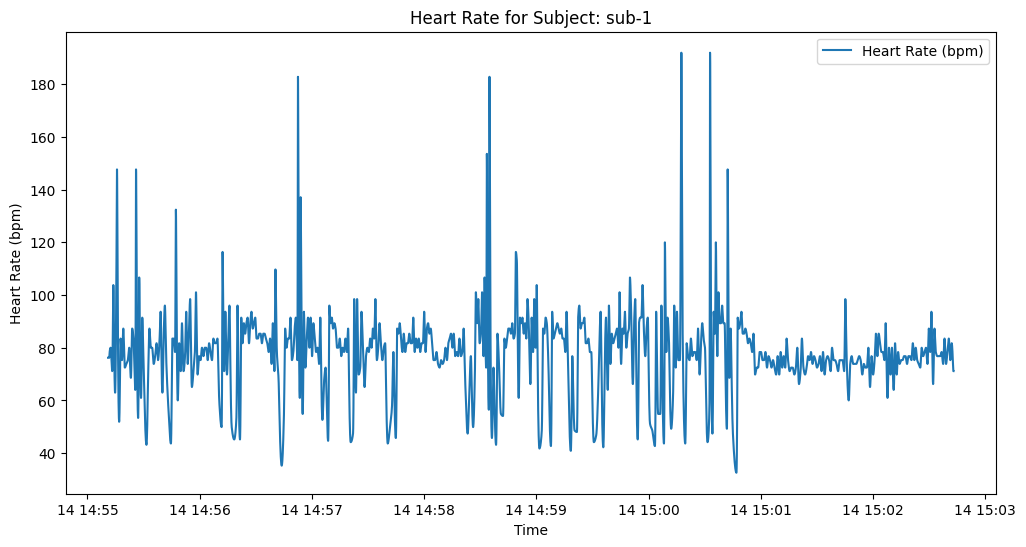

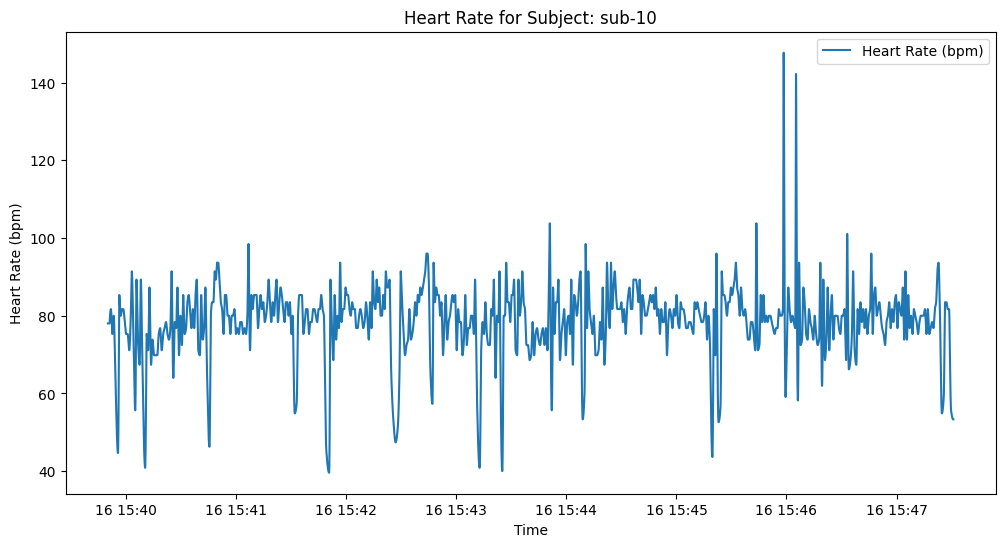

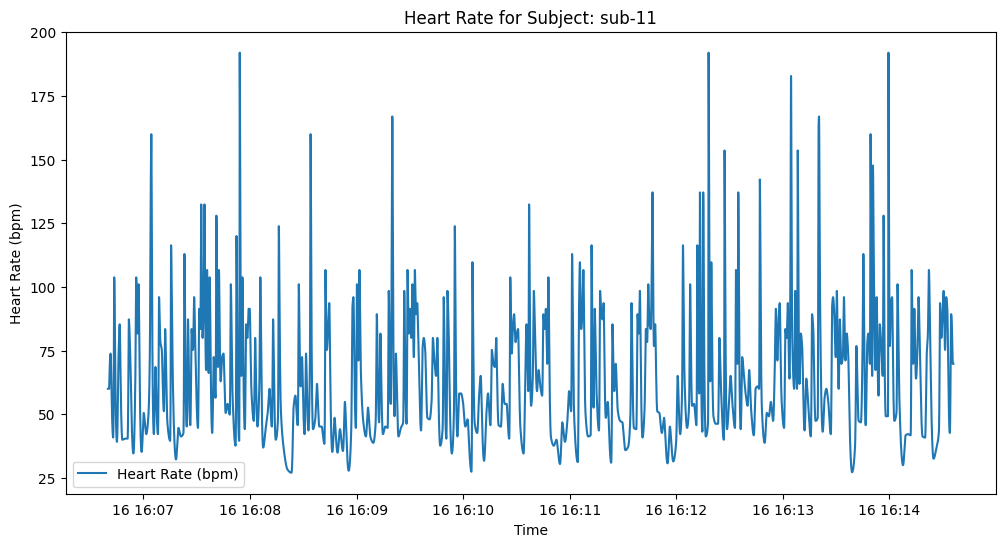

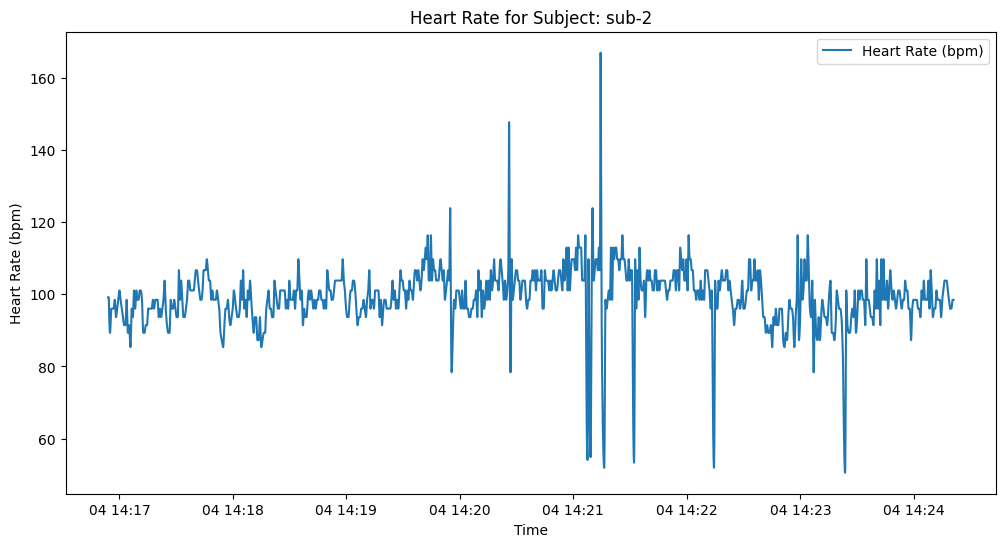

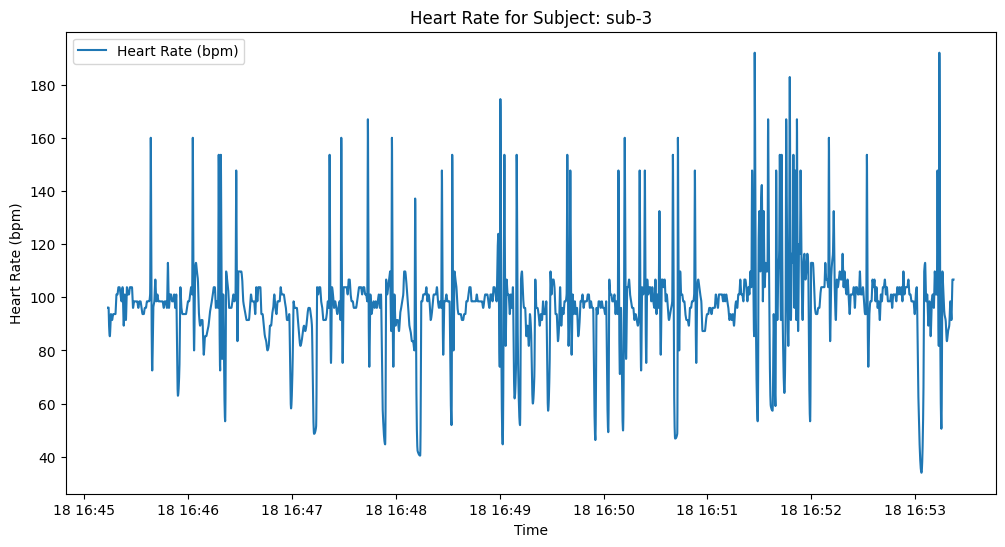

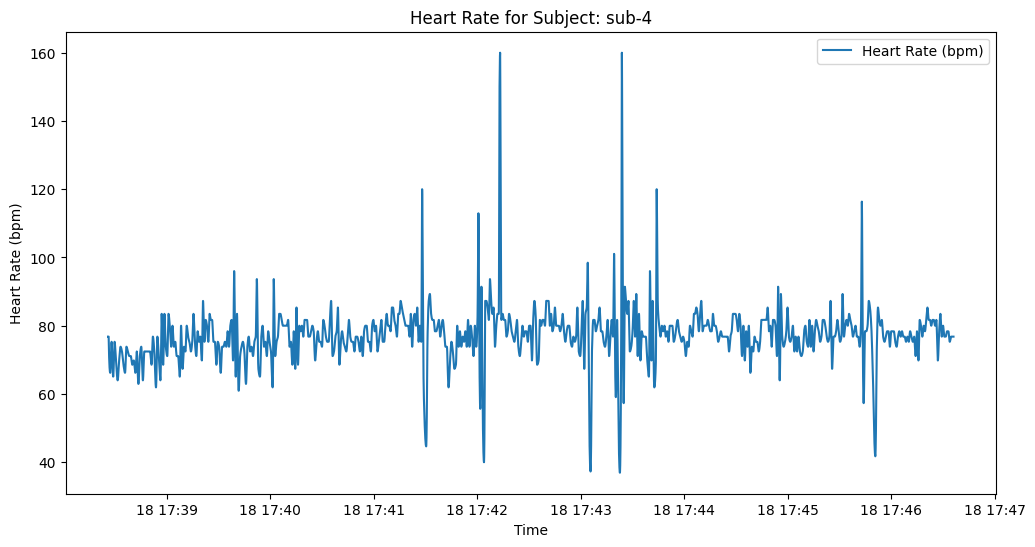

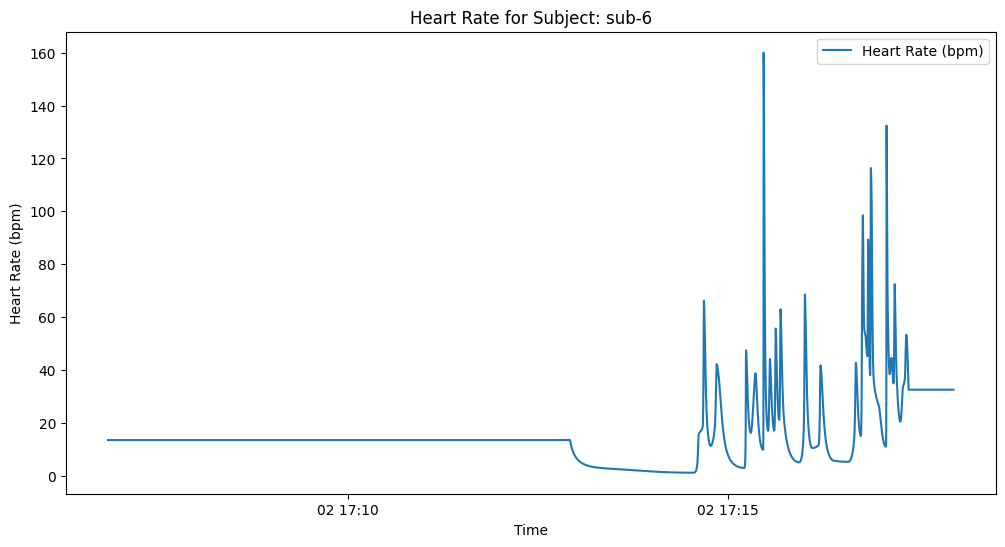

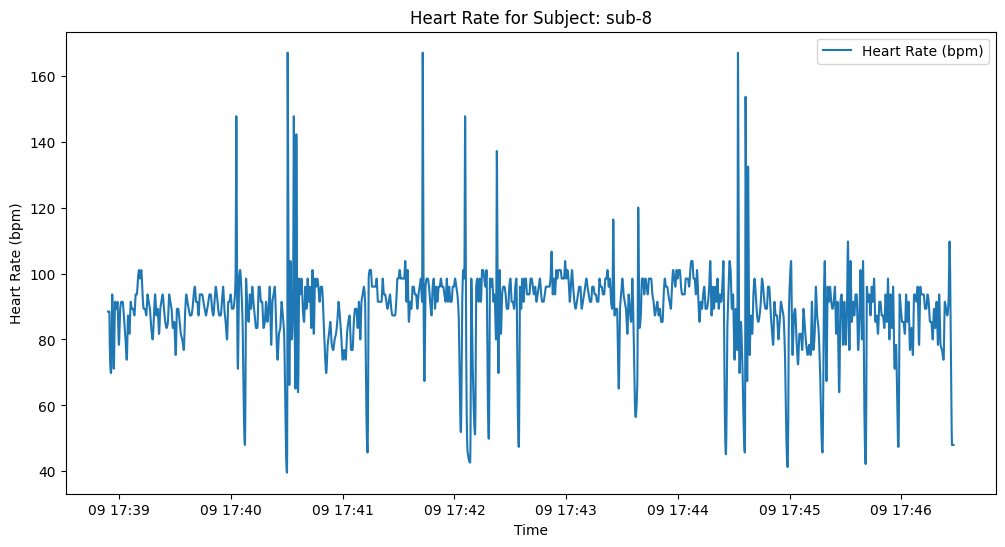

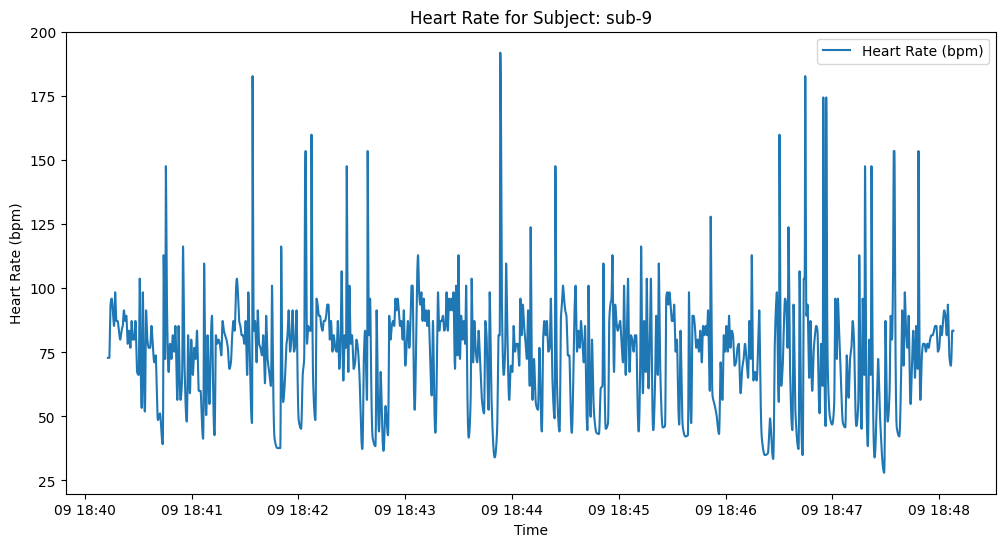

In [32]:

import os
import pandas as pd
import matplotlib.pyplot as plt

# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/neurokit-64-hr'

# Loop through subfolders
for sub_folder in sorted(os.listdir(base_dir)):
    sub_path = os.path.join(base_dir, sub_folder)

    # Check if it's a directory
    if os.path.isdir(sub_path):
        session_file = 'session-4.csv'  # Target session file
        session_path = os.path.join(sub_path, session_file)

        # Check if session-1.csv exists
        if os.path.exists(session_path):
            try:
                # Read the CSV file
                data = pd.read_csv(session_path)

                # Assuming x-axis and y-axis data are in 'timestamp' and 'EDA_Tonic'
                # x_data = df['Timestamp_New']
                # y_data = df['PPG_Rate']


                # Plot heart rate over time
                plt.figure(figsize=(12, 6))
                data['Timestamp']= pd.to_datetime(data['Timestamp_New'], utc=True)
                plt.plot(data['Timestamp'], data['PPG_Rate'], label='Heart Rate (bpm)')
                plt.xlabel('Time')
                plt.ylabel('Heart Rate (bpm)')
                plt.title(f'Heart Rate for Subject: {sub_folder}')
                plt.legend()
                plt.show()
                # Close the plot for next iteration
                plt.close()
            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_path}: {e}")

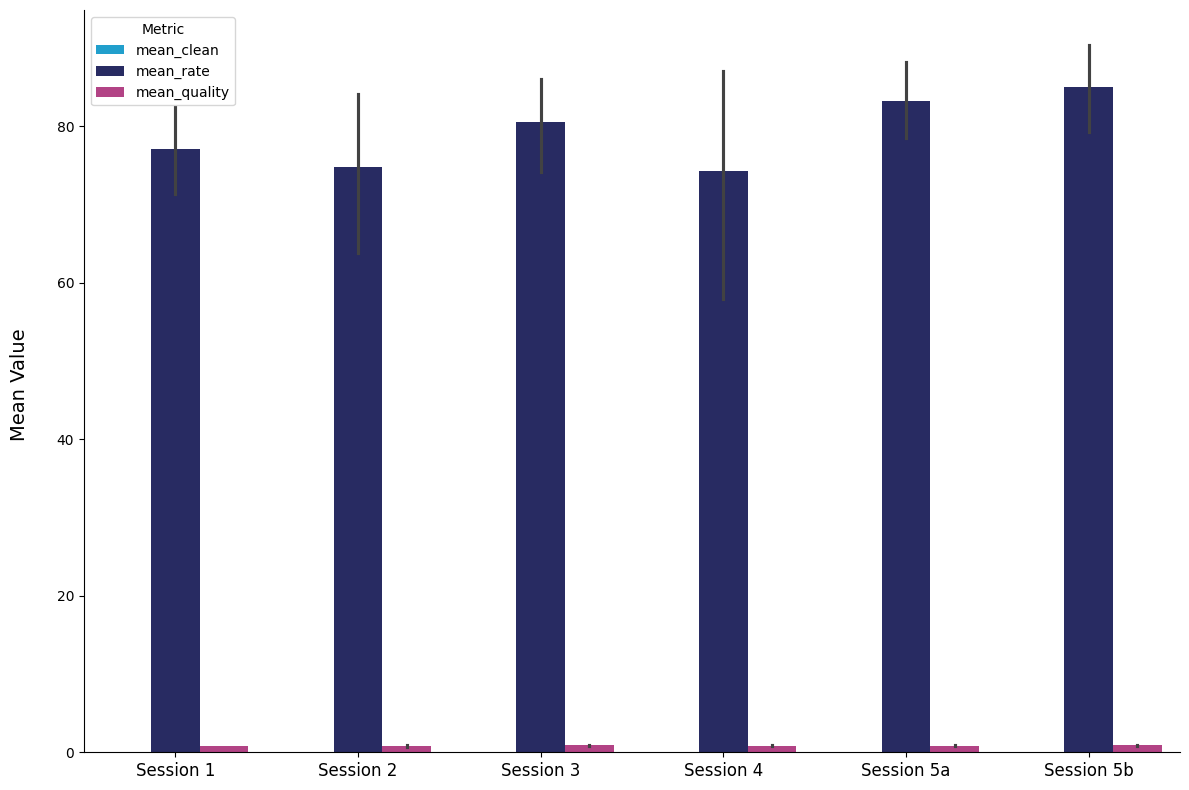

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define base directories
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/neurokit-64-hr'
# fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Define sessions and their labels
sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

# Loop through each session and calculate means for PPG_Clean, PPG_Rate, and PPG_Quality
for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                
                # Calculate the mean values for PPG_Clean, PPG_Rate, and PPG_Quality
                mean_clean = df_session['PPG_Clean'].mean()
                mean_rate = df_session['PPG_Rate'].mean()
                mean_quality = df_session['PPG_Quality'].mean()

                # Store the means along with the subject ID
                session_means[session_name].append([sub_dir, mean_clean, mean_rate, mean_quality])

    # Convert list to DataFrame and name the columns
    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_clean', 'mean_rate', 'mean_quality'])

# Concatenate all sessions into one DataFrame
all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

# Order the subjects and fill missing values with the mean
subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
# df_all_sessions['mean_clean'].fillna(df_all_sessions['mean_clean'].mean(), inplace=True)
df_all_sessions['mean_rate'].fillna(df_all_sessions['mean_rate'].mean(), inplace=True)
# df_all_sessions['mean_quality'].fillna(df_all_sessions['mean_quality'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])

# Melt the DataFrame for easier plotting (long format)
df_melted = pd.melt(df_all_sessions, id_vars=['subject', 'session'], value_vars=['mean_clean', 'mean_rate', 'mean_quality'], 
                    var_name='Metric', value_name='Value')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))

# Define labels for the x-axis
labels = ['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5a', 'Session 5b']

# Create the grouped bar plot using 'hue' to differentiate PPG_Clean, PPG_Rate, and PPG_Quality
sns.barplot(data=df_melted, x='session', y='Value', hue='Metric', palette=['#05ace8', '#1e226c', '#c53088'])
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Value \n', fontsize=14)
plt.tight_layout()
sns.despine()

# Uncomment below to save the figure
# plt.savefig(f"{fig_dir}/grouped-ppg-session-means.png", dpi=300)

plt.show()
# print (df_all_sessions)

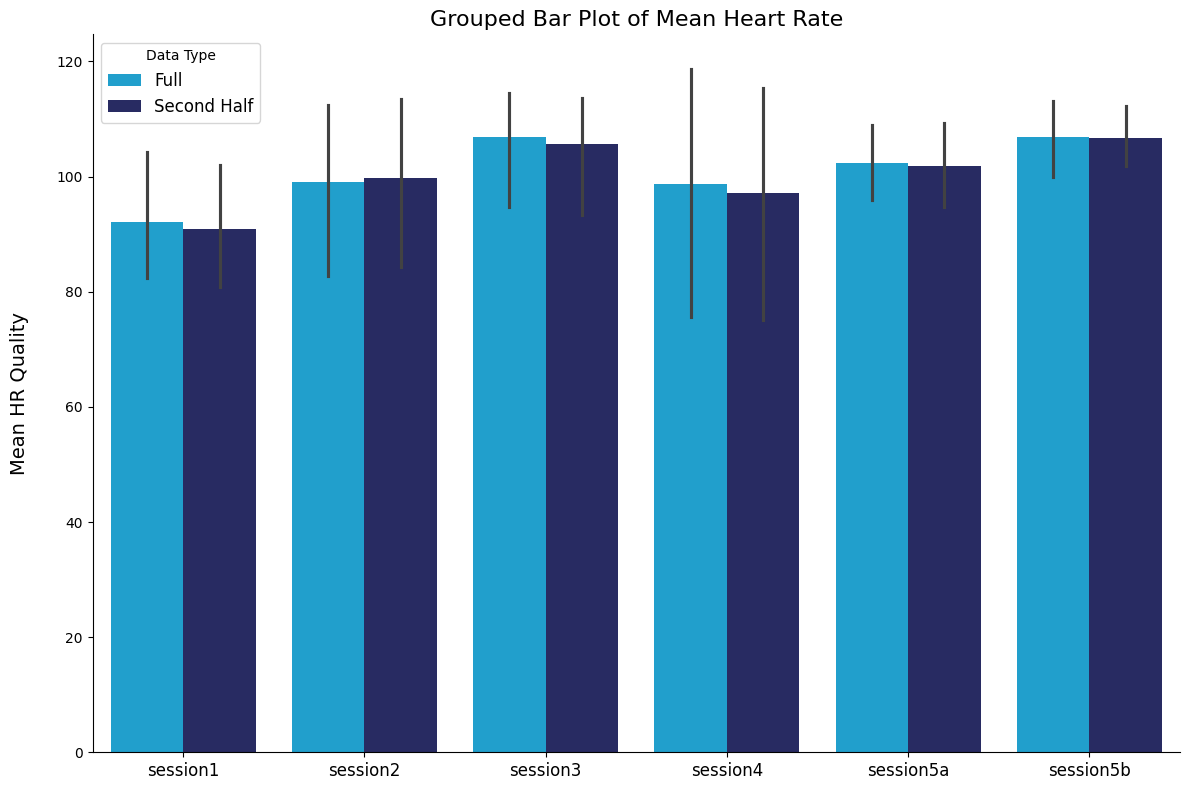

In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/processed-hr'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means_full = []
session_means_second_half = []

for session_file, session_name in zip(sessions, session_names):
    # Loop through subjects
    for sub_dir in sorted(os.listdir(base_dir)):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)

                # Calculate mean for the full data
                mean_full = df_session['PPG_Rate'].mean()
                session_means_full.append([sub_dir, session_name, mean_full])

                # Calculate mean for the second half
                half_way_point = int(len(df_session) / 2)
                df_session_second_half = df_session.iloc[half_way_point:]
                mean_tonic_eda = df_session_second_half['PPG_Rate'].mean()
                session_means_second_half.append([sub_dir, session_name, mean_tonic_eda])

# Create DataFrames for full and second half means
df_full_means = pd.DataFrame(session_means_full, columns=['subject', 'session', 'mean_tonic_eda'])
df_second_half_means = pd.DataFrame(session_means_second_half, columns=['subject', 'session', 'mean_tonic_eda'])

# Add a new column to distinguish between full and second half means
df_full_means['data_type'] = 'Full'
df_second_half_means['data_type'] = 'Second Half'

# Concatenate the DataFrames
df_all_sessions = pd.concat([df_full_means, df_second_half_means], ignore_index=True)

# Now you can proceed with your plotting code

# Order subjects for plotting
subject_order = [f'sub-{i}' for i in range(1, 11)]
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)

# Fill NaN values (if any)
df_all_sessions['mean_tonic_eda'].fillna(df_all_sessions['mean_tonic_eda'].mean(), inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

sns.barplot(data=df_all_sessions, x='session', y='mean_tonic_eda', hue='data_type', palette=["#05ace8", "#1e226c"])
plt.xlabel(None)
plt.ylabel('Mean HR Quality\n', fontsize=14)
plt.title('Grouped Bar Plot of Mean Heart Rate', fontsize=16)
plt.xticks(fontsize=12)
plt.legend(title='Data Type', fontsize=12)
plt.tight_layout()
sns.despine()

# # Save figure if specified
# save_figs = 1  # Adjust as necessary
# if save_figs == 1:
#     plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)

plt.show()


In [7]:
import os
import pandas as pd

# Path to the main folder containing subfolders for each subject
main_folder = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/processed-hr'

# Dictionary to store the mean SCR_Amplitude values for each subject and session
subject_mean_data = {}

# Traverse the main folder
for subject_folder in sorted(os.listdir(main_folder)):
    subject_path = os.path.join(main_folder, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store mean SCR_Amplitude values for each session
        session_mean_data = {}

        # Traverse the session files in each subject folder
        for session_file in sorted(os.listdir(subject_path)):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Calculate the mean SCR_Height where SCR_Peaks == 1 and SCR_Height > 0.02
                mean_SCR_Amp = df.loc[(df['PPG_Peaks'] == 1), 'PPG_Rate'].mean()

                # Save the mean value for the session
                session_mean_data[session_file] = mean_SCR_Amp
        
        # Save the mean data for the subject
        subject_mean_data[subject_folder] = session_mean_data

# Print the mean SCR_Amplitude values for each subject and session
for subject, sessions in subject_mean_data.items():
    print(f"Subject: {subject}")
    for session, mean_value in sessions.items():
        print(f"  Session: {session}, Mean HR: {mean_value}")
    print("-" * 50)  # Divider between subjects


Subject: sub-1
  Session: session-1.csv, Mean HR: 80.33451932764125
  Session: session-2.csv, Mean HR: 81.72988430772389
  Session: session-3.csv, Mean HR: 80.61593088041943
  Session: session-4.csv, Mean HR: 109.7616514644222
  Session: session-5a.csv, Mean HR: 100.77204900472428
  Session: session-5b.csv, Mean HR: 103.90814257241632
--------------------------------------------------
Subject: sub-10
  Session: session-1.csv, Mean HR: 131.97975390569476
  Session: session-2.csv, Mean HR: 127.23933265818685
  Session: session-3.csv, Mean HR: 128.0321519057435
  Session: session-4.csv, Mean HR: 119.65541800603256
  Session: session-5a.csv, Mean HR: 121.66176023011394
  Session: session-5b.csv, Mean HR: 127.31787906840243
--------------------------------------------------
Subject: sub-11
  Session: session-1.csv, Mean HR: 106.15918791657853
  Session: session-2.csv, Mean HR: 112.59643049758868
  Session: session-3.csv, Mean HR: 119.92502720931782
  Session: session-4.csv, Mean HR: 76.2978

/var/folders/0k/9bsh4pdj35g8kpn493zfhbsr0000gn/T/ipykernel_1549/1844419439.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=all_sessions, y=overall_mean_values, palette='dark:#4B7', saturation=0.8, ci=None)
/var/folders/0k/9bsh4pdj35g8kpn493zfhbsr0000gn/T/ipykernel_1549/1844419439.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_sessions, y=overall_mean_values, palette='dark:#4B7', saturation=0.8, ci=None)


<Figure size 1000x600 with 0 Axes>

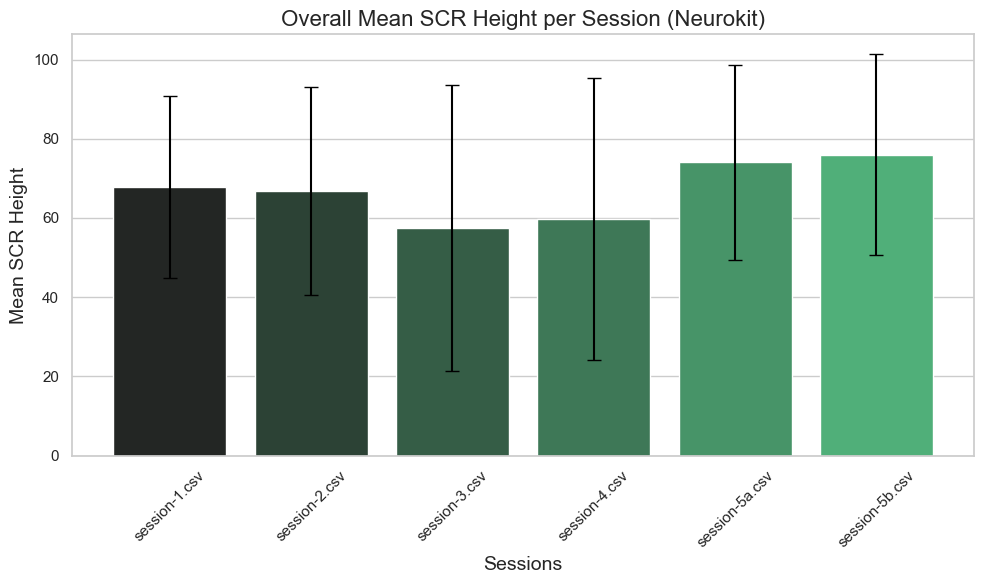

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the main folder containing subfolders for each subject
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr 2'

# Dictionary to store the mean SCR_Amplitude values for each subject and session
subject_mean_data = {}

# Traverse the main folder
for subject_folder in sorted(os.listdir(base_dir)):
    subject_path = os.path.join(base_dir, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store mean SCR_Amplitude values for each session
        session_mean_data = {}

        # Traverse the session files in each subject folder
        for session_file in sorted(os.listdir(subject_path)):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Calculate the mean SCR_Amplitude where SCR_Peaks == 1
                mean_HR = df['PPG_Rate'].mean()
                # mean_SCR_Amp = df.loc[df['SCR_Peaks'] == 1, 'SCR_Height'].mean()
                # mean_SCR_Amp = df.loc[(df['SCR_Peaks'] == 1) & (df['SCR_Height'] > 0.02), 'SCR_Height'].mean()
                # Save the mean value for the session
                session_mean_data[session_file] =  mean_HR
        
        # Save the mean data for the subject
        subject_mean_data[subject_folder] = session_mean_data

# Calculate overall mean SCR_Amplitude per session across all subjects
overall_mean_data = {}
all_sessions = sorted(list({session for sessions in subject_mean_data.values() for session in sessions}))

# Traverse all sessions and calculate mean across all subjects for each session
for session in all_sessions:
    session_values = [sessions.get(session, 0) for sessions in subject_mean_data.values()]
    overall_mean_data[session] = np.mean(session_values)

# Plotting only the overall mean SCR_Amplitude values for each session
plt.figure(figsize=(10, 6))


# Set the plot style using Seaborn for better aesthetics
sns.set(style="whitegrid")

# Prepare data for the plot
overall_mean_values = [overall_mean_data[session] for session in all_sessions]

# Calculate the standard deviation for each session across subjects (for error bars)
session_std_devs = [np.std([sessions.get(session, 0) for sessions in subject_mean_data.values()]) for session in all_sessions]

# Plotting the bar graph with error bars
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn with error bars
sns.barplot(x=all_sessions, y=overall_mean_values, palette='dark:#4B7', saturation=0.8, ci=None)

# Add error bars manually using plt.errorbar
plt.errorbar(all_sessions, overall_mean_values, yerr=session_std_devs, fmt='none', c='black', capsize=5)

# Add labels and title
plt.xlabel('Sessions', fontsize=14)
plt.ylabel('Mean SCR Height', fontsize=14)
plt.title('Overall Mean SCR Height per Session (Neurokit)', fontsize=16)

# Rotate session labels for readability
plt.xticks(rotation=45)

# Show the plot with tight layout
plt.tight_layout()

# Display the plot
plt.show()


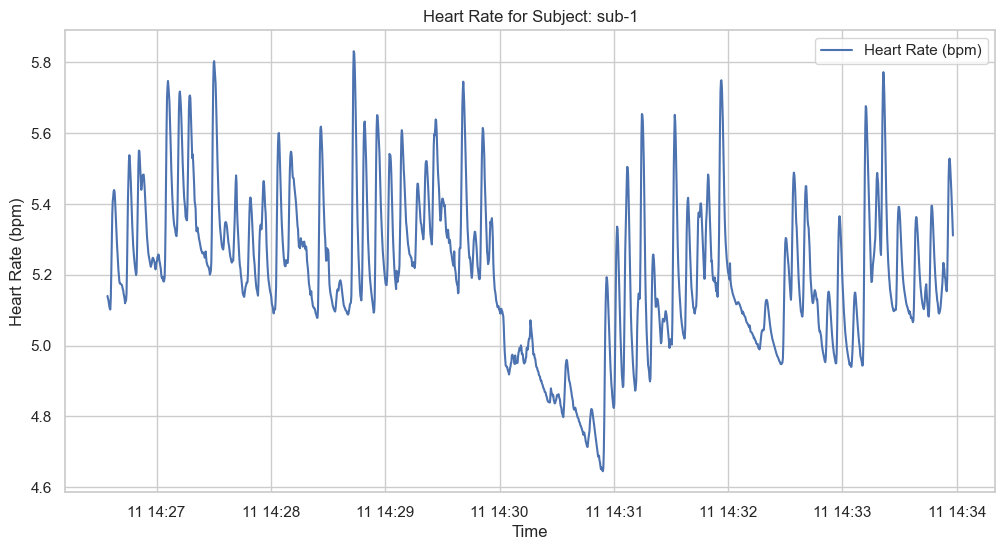

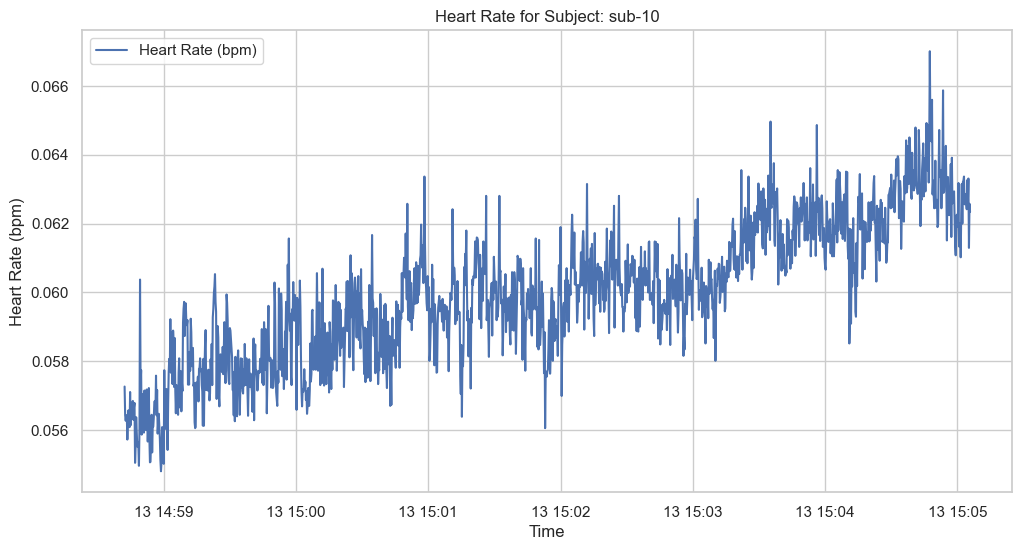

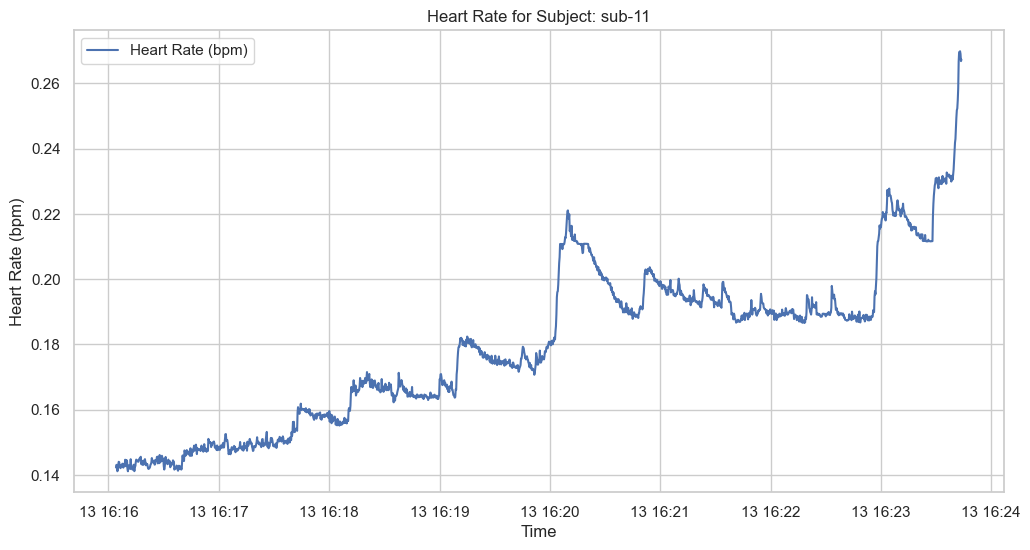

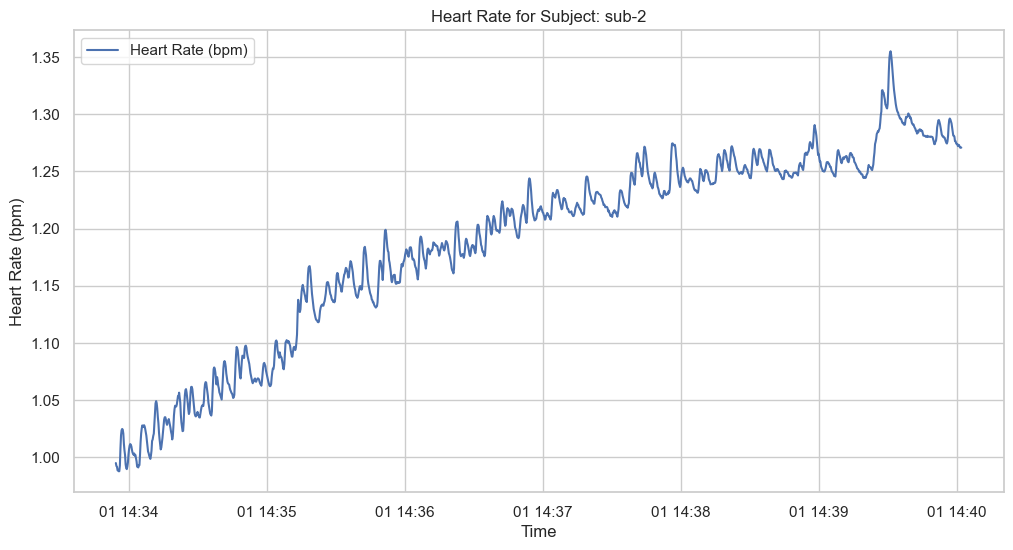

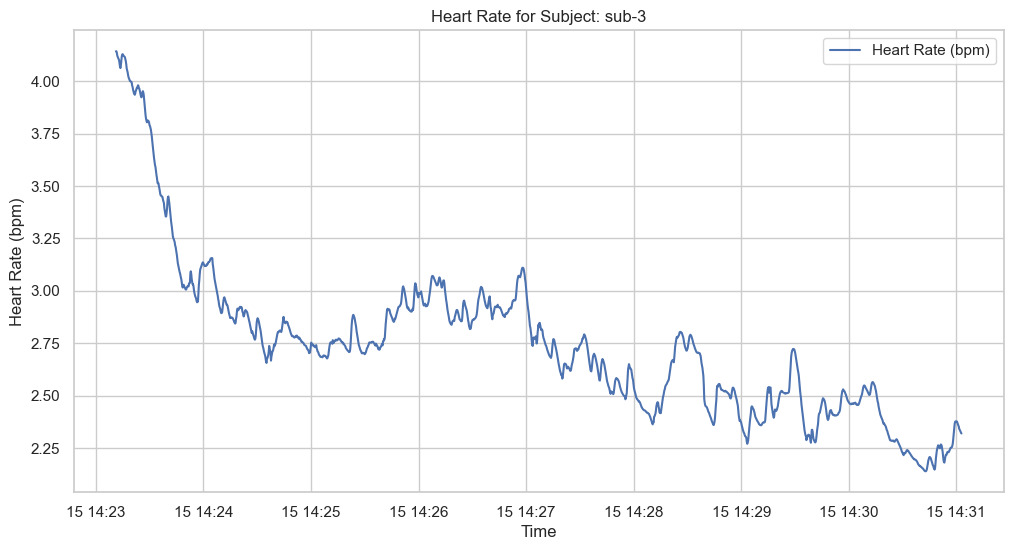

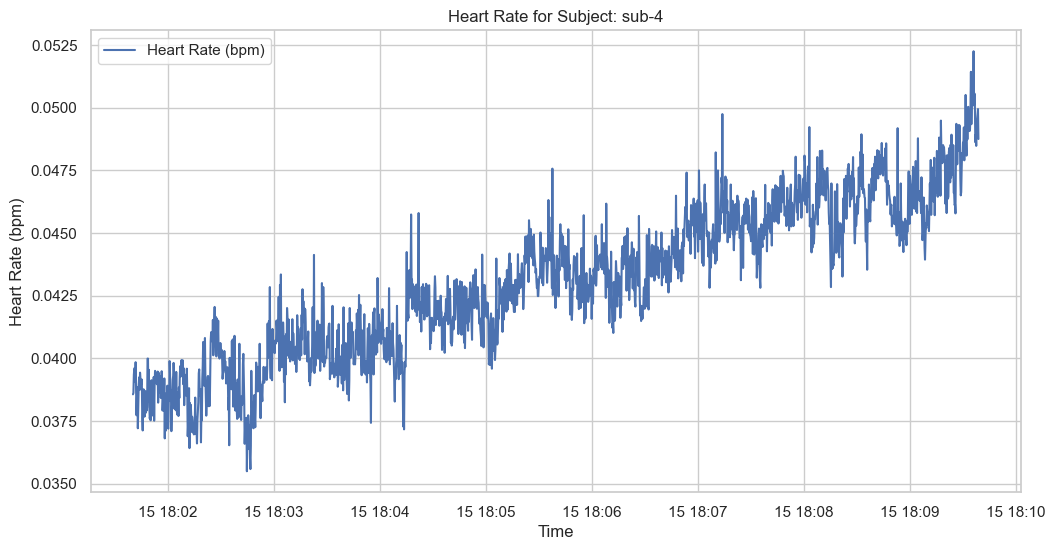

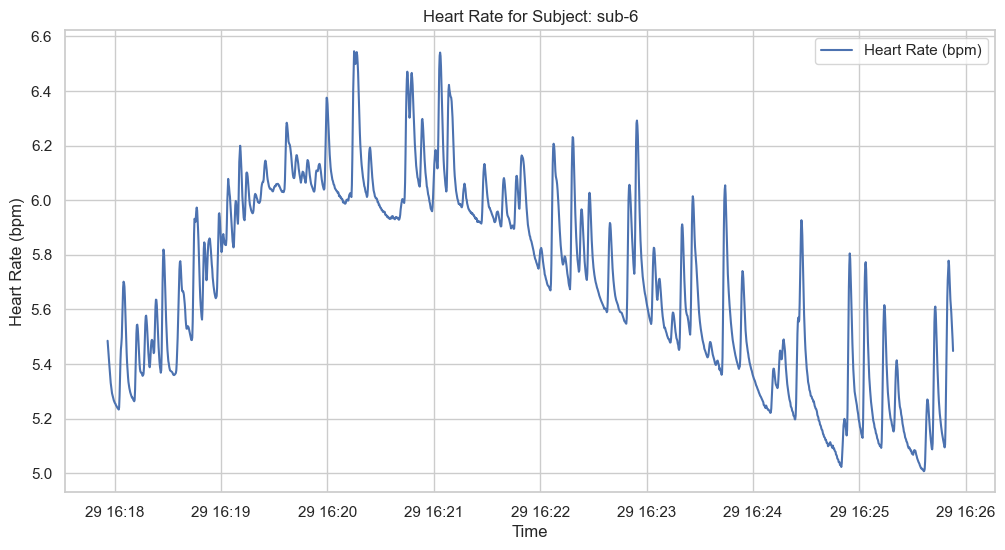

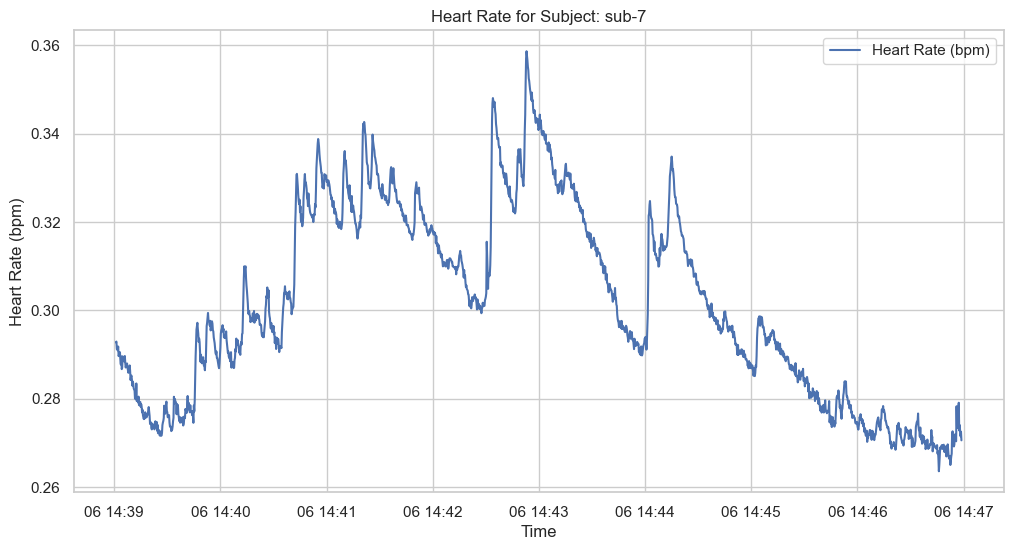

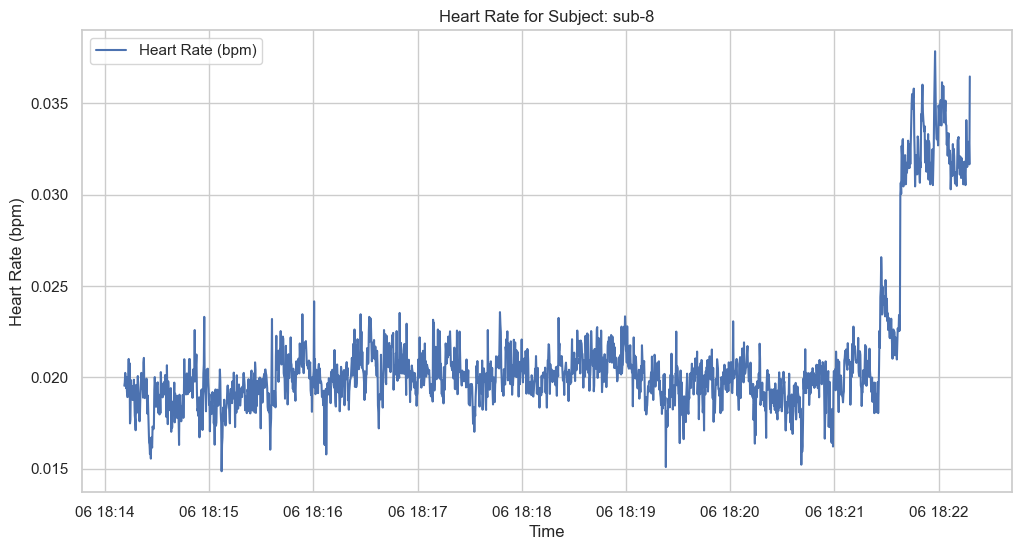

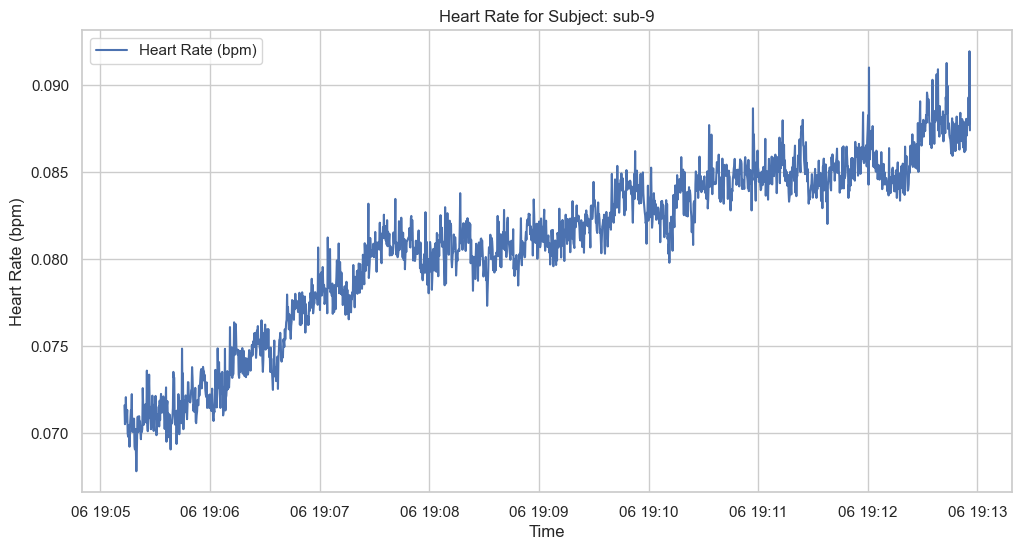

In [46]:

import os
import pandas as pd
import matplotlib.pyplot as plt

# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'

# Loop through subfolders
for sub_folder in sorted(os.listdir(base_dir)):
    sub_path = os.path.join(base_dir, sub_folder)

    # Check if it's a directory
    if os.path.isdir(sub_path):
        session_file = 'session-1.csv'  # Target session file
        session_path = os.path.join(sub_path, session_file)

        # Check if session-1.csv exists
        if os.path.exists(session_path):
            try:
                # Read the CSV file
                data = pd.read_csv(session_path)

                # Assuming x-axis and y-axis data are in 'timestamp' and 'EDA_Tonic'
                # x_data = df['Timestamp_New']
                # y_data = df['PPG_Rate']


                # Plot heart rate over time
                plt.figure(figsize=(12, 6))
                data['Timestamp']= pd.to_datetime(data['timestamp'], utc=True)
                plt.plot(data['Timestamp'], data['eda_raw'], label='Heart Rate (bpm)')
                plt.xlabel('Time')
                plt.ylabel('Heart Rate (bpm)')
                plt.title(f'Heart Rate for Subject: {sub_folder}')
                plt.legend()
                plt.show()
                # Close the plot for next iteration
                plt.close()
            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_path}: {e}")